# 🌸 Task 1: Exploring and Visualizing the Iris Dataset

In this notebook, we'll:
- Load and inspect the famous Iris dataset 🌼
- Generate descriptive statistics
- Visualize distributions, relationships, and outliers using Matplotlib and Seaborn 🎨


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import itertools
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# Set beautiful seaborn style
sns.set(style="whitegrid", palette="pastel", font_scale=1.1)


## 📂 Load the Iris Dataset

We use Seaborn's built-in Iris dataset.


In [3]:
df = sns.load_dataset('iris')
df.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## 📊 Dataset Overview

Let's inspect the dataset: shape, column names, info, and stats.


In [4]:
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())
df.info()


Shape: (150, 5)
Columns: ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


## 📌 Descriptive Stats

In [5]:
df.describe()


,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Checking Null Values

In [6]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

## 🌼 Scatter Plot: Sepal Length vs Sepal Width
Colored by Species


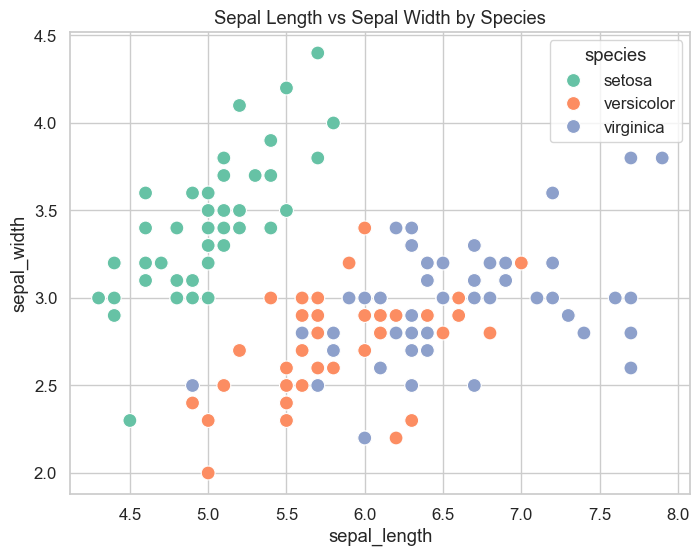

In [7]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="sepal_length", y="sepal_width", hue="species", palette="Set2", s=100)
plt.title("Sepal Length vs Sepal Width by Species")
plt.show()


## 📊 Histograms: Distribution of Each Feature


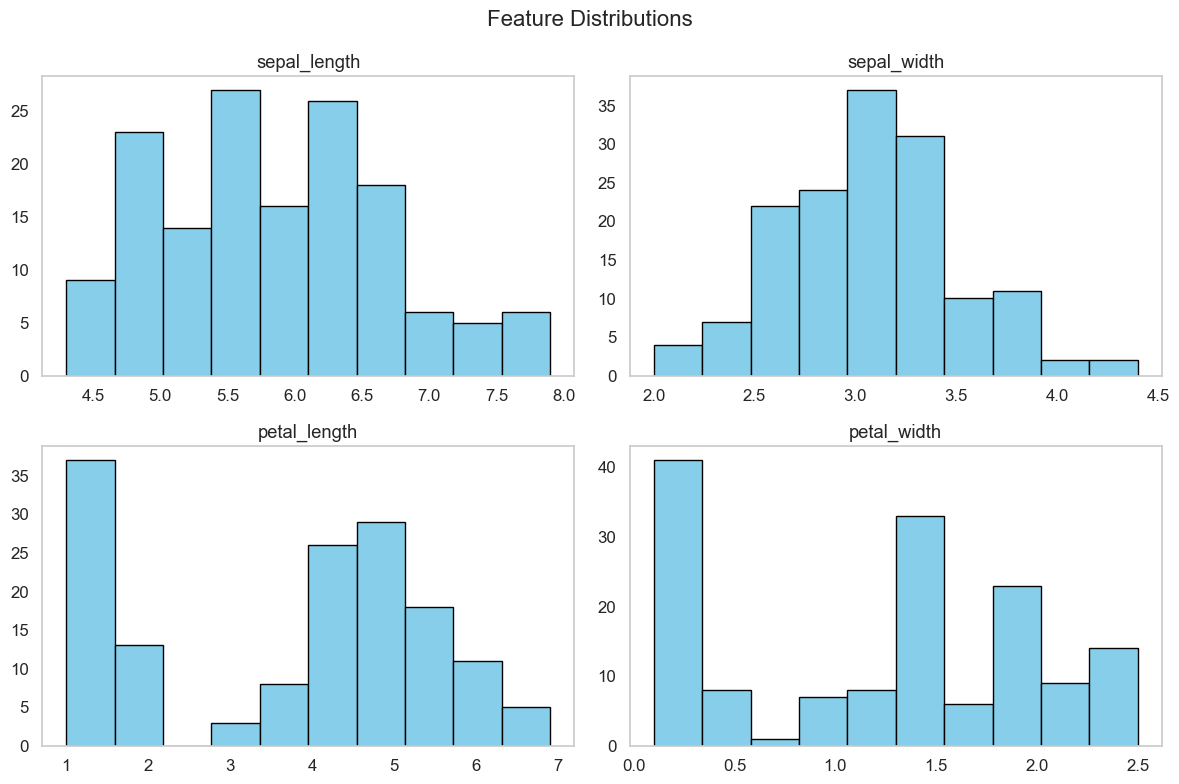

In [8]:
# Create histograms for all numeric columns in the DataFrame
df.hist(
    figsize=(12, 8),        # Set overall figure size
    color='skyblue',        # Set fill color of bars
    edgecolor='black',      # Set border color of bars
    grid=False              # Disable grid for a cleaner look
)

# Set a common title for the entire figure
plt.suptitle("Feature Distributions", fontsize=16)

# Adjust subplot spacing to avoid overlap
plt.tight_layout()

# Show the plot
plt.show()


## 📦 Box Plots: Spotting Outliers by Species


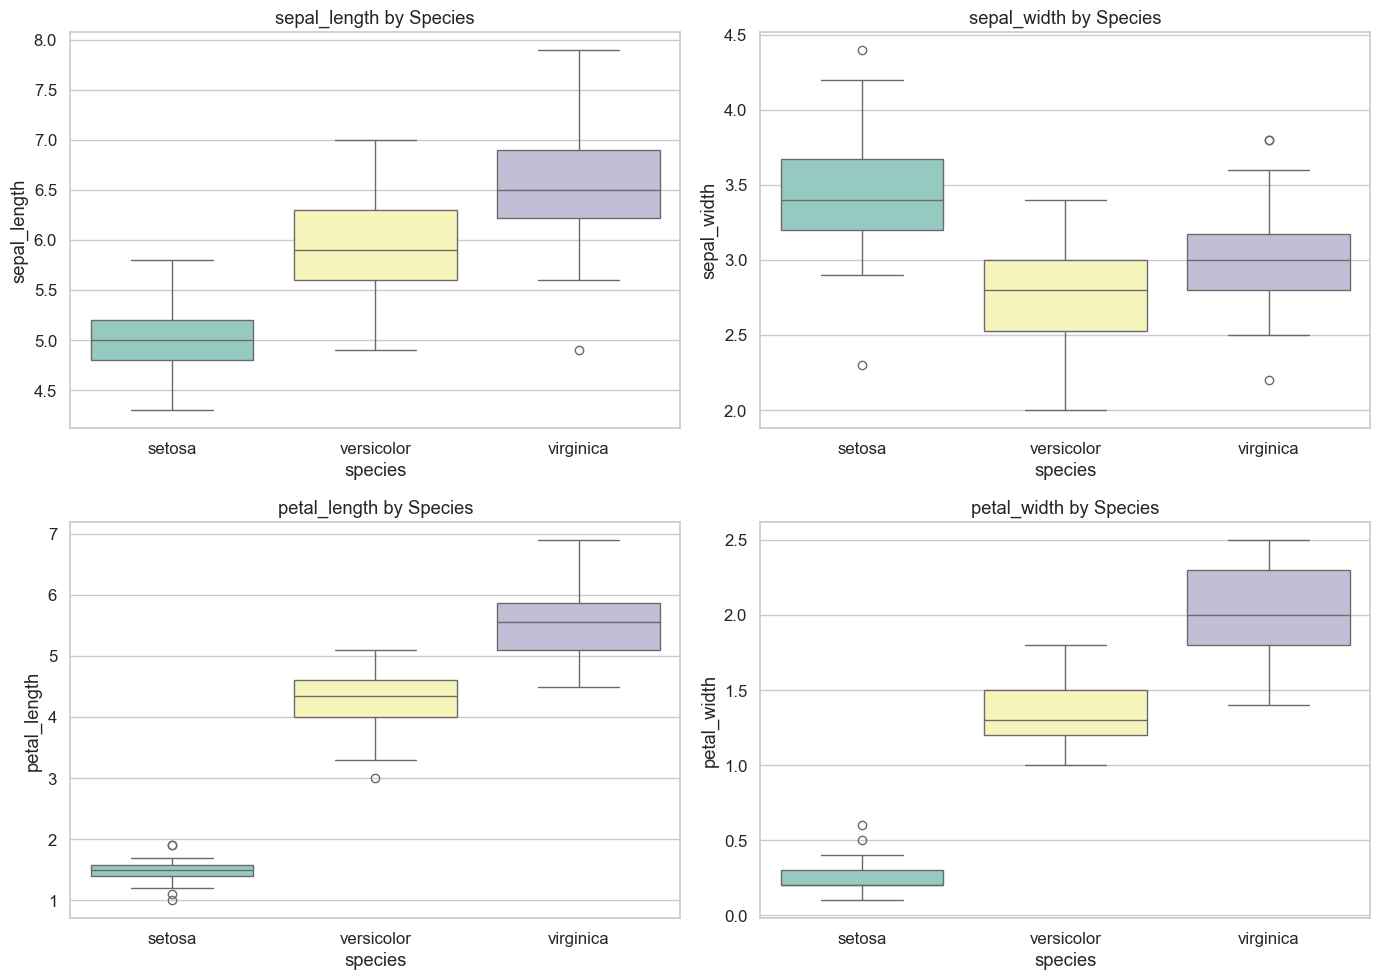

In [9]:
# Select all feature columns except the last one (species)
features = df.columns[:-1]

# Create a figure with custom size
plt.figure(figsize=(14, 10))

# Loop over each feature to create individual box plots
for i, feature in enumerate(features):
    plt.subplot(2, 2, i+1)  # Create a 2x2 subplot grid and select the (i+1)th plot
    sns.boxplot(data=df, x='species', y=feature, palette='Set3', hue='species')  # Box plot with species as category
    plt.title(f'{feature} by Species')  # Title of each subplot

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()  # Display the plots



## 🔗 Pair Plot: Full Feature Comparison


C:\Users\Zain\AppData\Local\Temp\ipykernel_19668\1698849807.py:49: UserWarning: Glyph 127804 (\N{BLOSSOM}) missing from font(s) Arial.
  plt.tight_layout(rect=[0, 0, 1, 0.94])
C:\Users\Zain\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127804 (\N{BLOSSOM}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


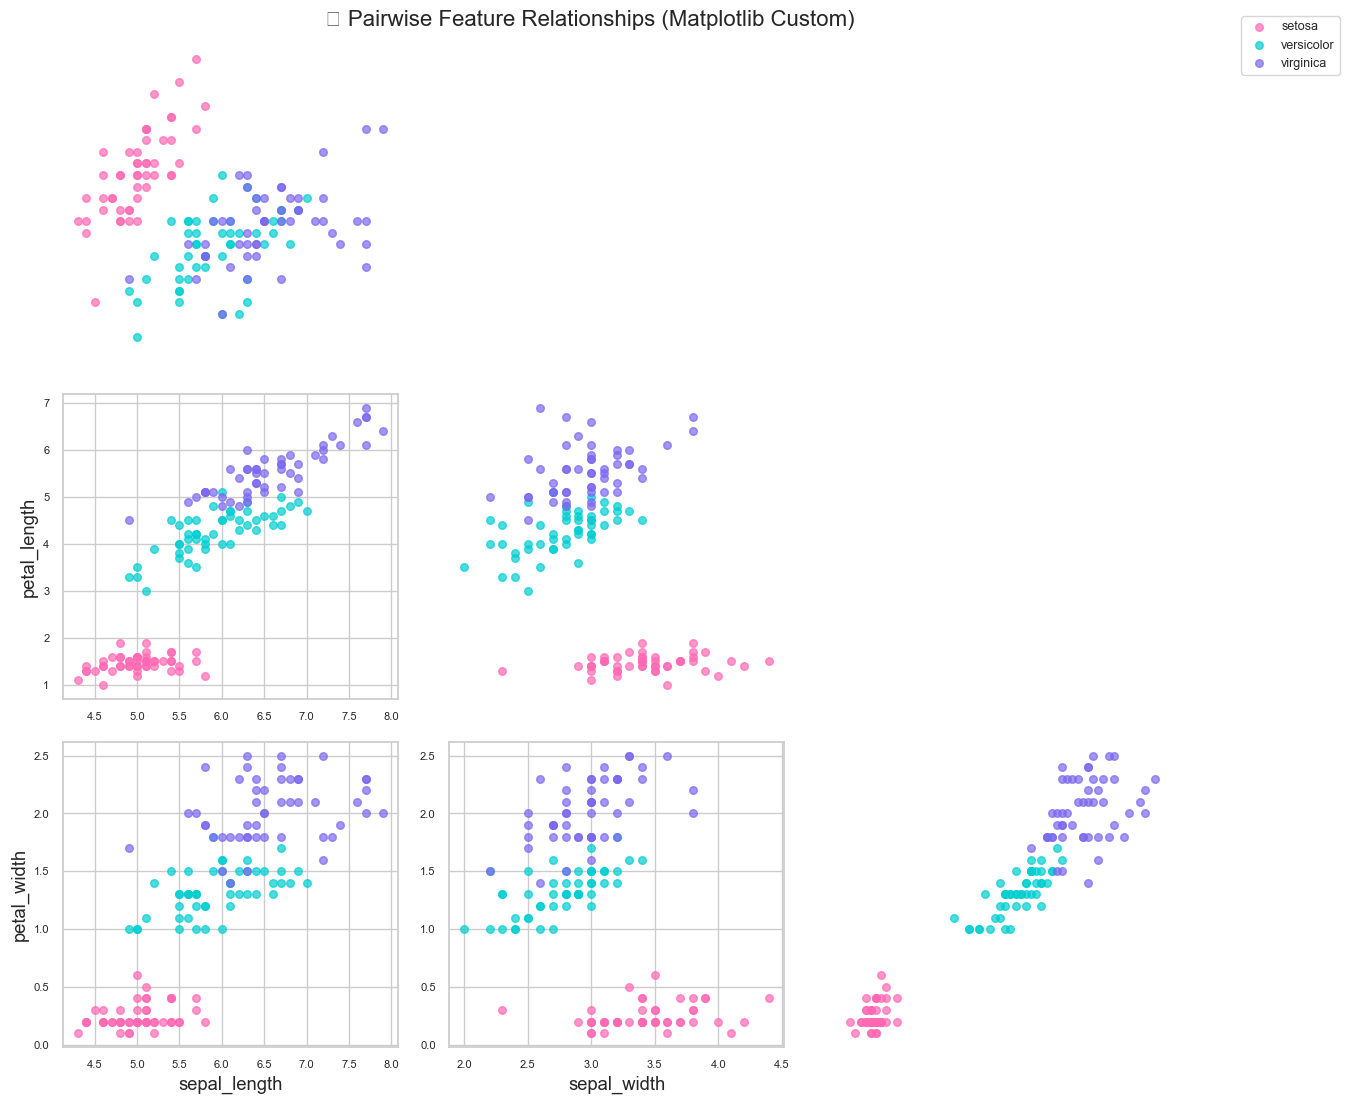

In [10]:
# Select all numerical feature columns (exclude the 'species' column)
features = df.columns[:-1]

# Get the unique species names
species = df['species'].unique()

# Assign custom colors to each species
colors = dict(zip(species, ['#FF69B4', '#00CED1', '#7B68EE']))  # pink, cyan, blue-violet

# Total number of numerical features
num_features = len(features)

# Create subplots in a square grid (corner plot = lower triangle only)
fig, axes = plt.subplots(num_features - 1, num_features - 1, figsize=(12, 12))

# Set a common title for the entire figure
fig.suptitle("🌼 Pairwise Feature Relationships (Matplotlib Custom)", fontsize=16, y=0.92)

# Loop through the lower triangle of the grid (to avoid redundant plots)
for row in range(1, num_features):
    for col in range(row):
        ax = axes[row - 1, col]  # Select appropriate subplot

        # Loop through each species and plot their scatter points
        for s in species:
            sub_df = df[df['species'] == s]
            ax.scatter(
                sub_df[features[col]],
                sub_df[features[row]],
                label=s if (row == num_features - 1 and col == 0) else "",  # Add legend only once
                alpha=0.7, s=30, color=colors[s]  # Style the scatter points
            )

        # Set axis labels for edge plots only
        ax.set_xlabel(features[col] if row == num_features - 1 else "")
        ax.set_ylabel(features[row] if col == 0 else "")
        ax.tick_params(axis='both', labelsize=8)  # Smaller ticks for neat layout

# Turn off unused (upper triangle) subplots
for row in range(num_features - 1):
    for col in range(num_features - 1):
        if col >= row:
            axes[row, col].axis('off')

# Add legend outside the plot area
fig.legend(species, loc='upper right', bbox_to_anchor=(1.13, 0.92), fontsize=9)

# Adjust layout to make space for title and legend
plt.tight_layout(rect=[0, 0, 1, 0.94])

# Display the plot
plt.show()


## 🔥 Heatmap: Feature Correlations


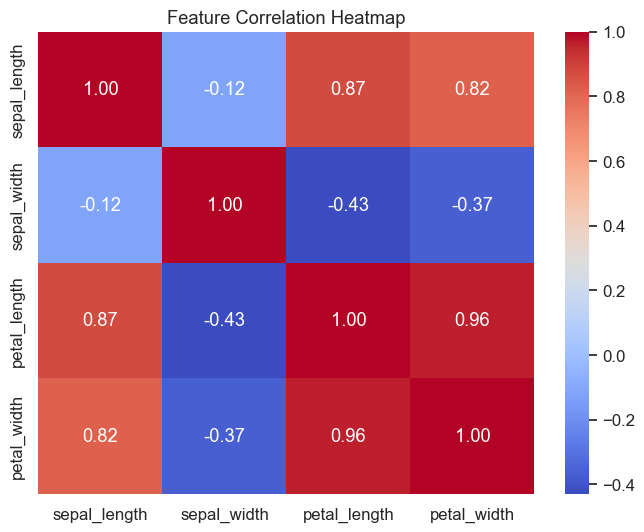

In [11]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.drop('species', axis=1).corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

## 🎯 KDE Plots: Density per Feature and Species


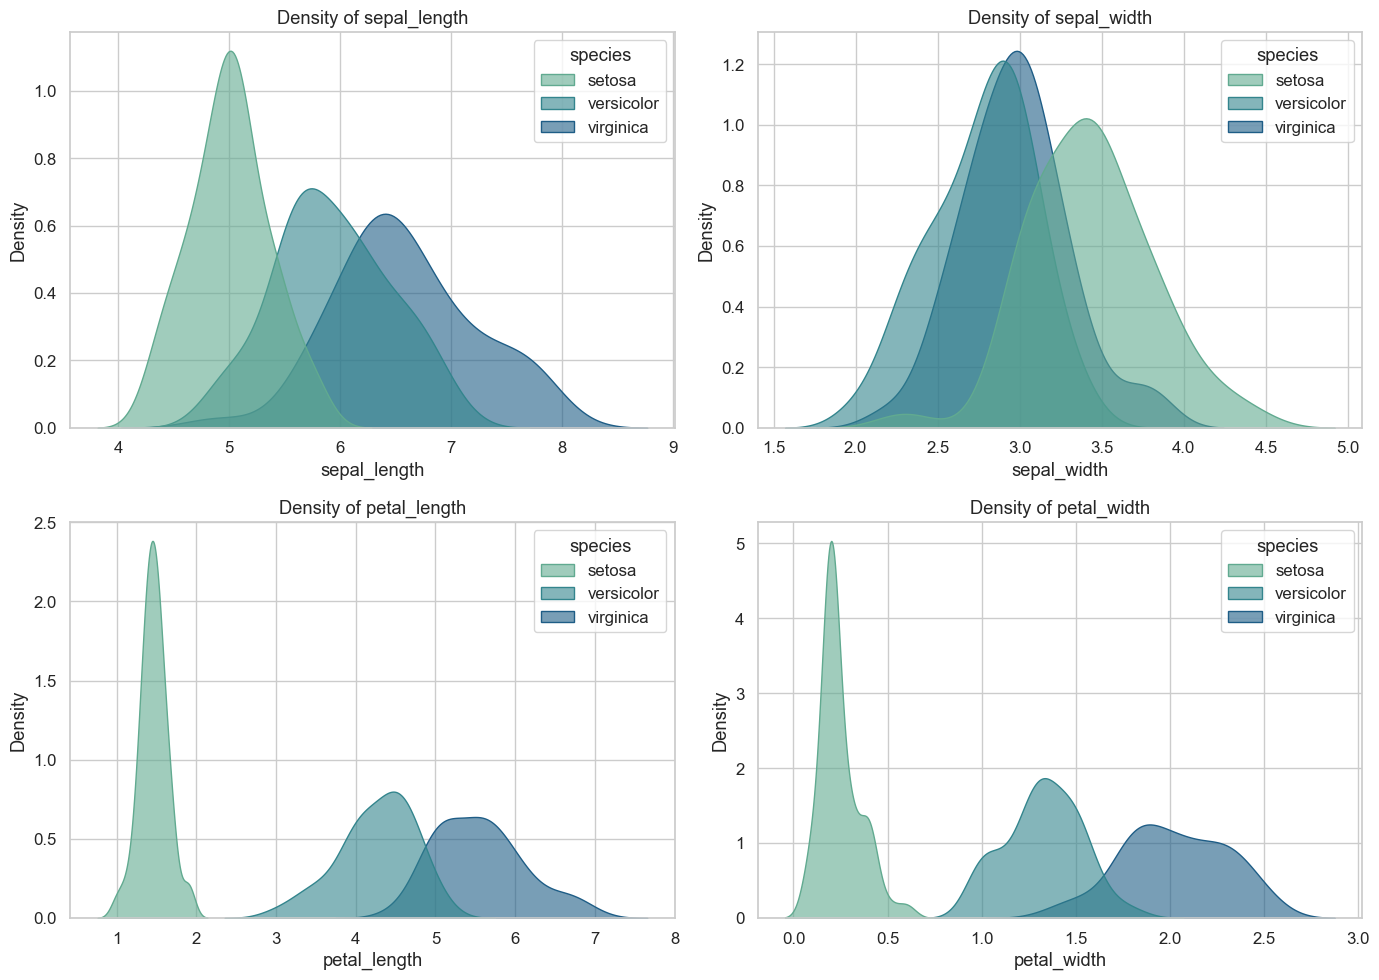

In [12]:
# KDE plots for each feature grouped by species
plt.figure(figsize=(14, 10))
for i, feature in enumerate(features):
    plt.subplot(2, 2, i+1)
    sns.kdeplot(data=df, x=feature, hue="species", fill=True, common_norm=False,
                palette="crest", alpha=0.6)
    plt.title(f'Density of {feature}')
plt.tight_layout()
plt.show()



## 🎻 Violin Plots: Feature Distribution and Spread


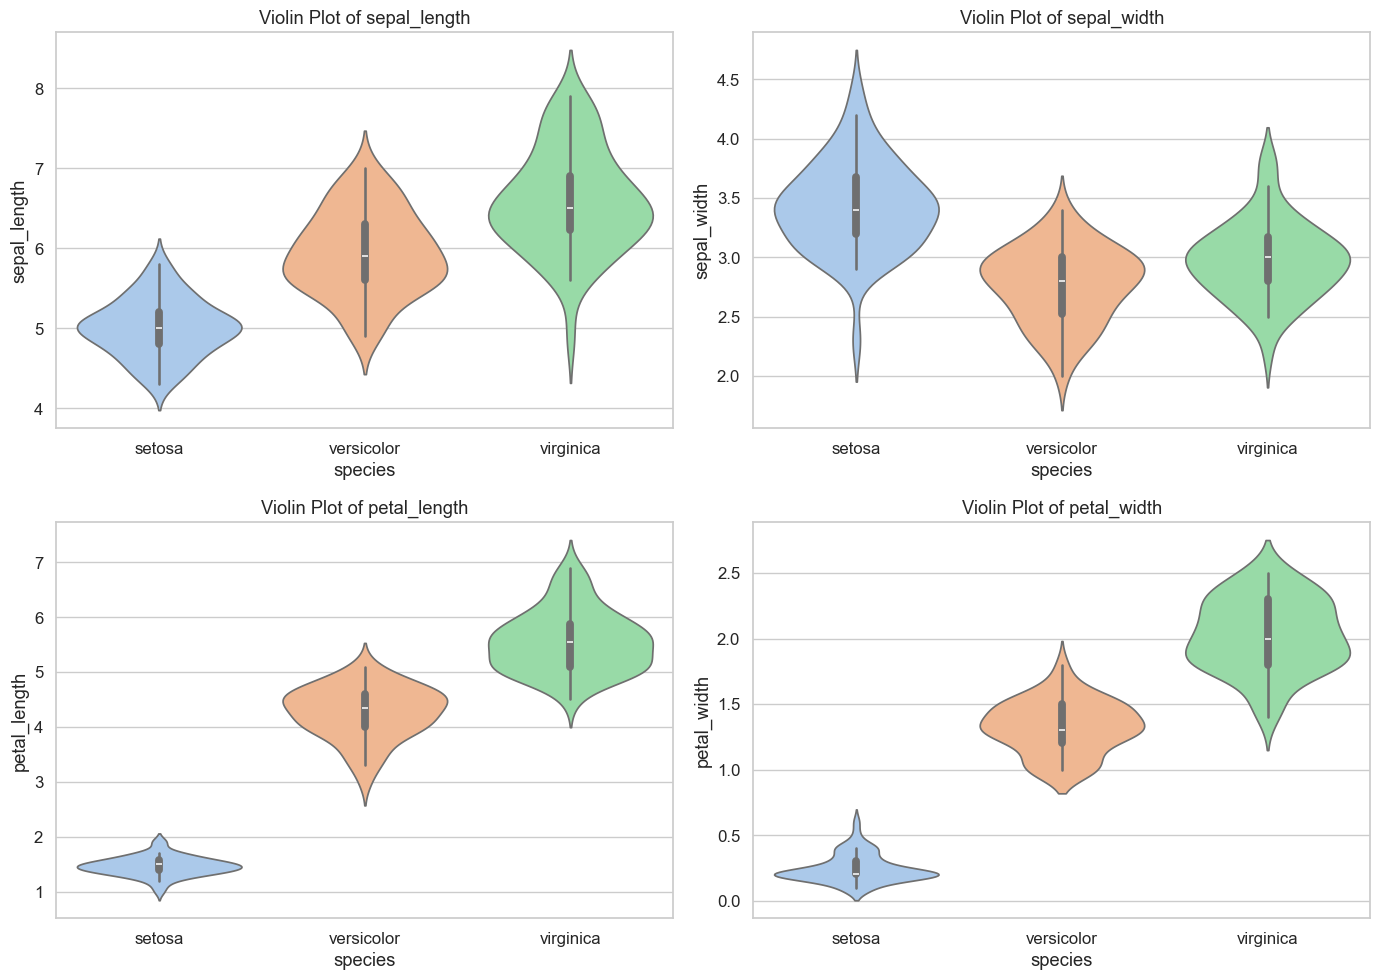

In [13]:

# Violin plots for each feature by species
plt.figure(figsize=(14, 10))
for i, feature in enumerate(features):
    plt.subplot(2, 2, i+1)
    sns.violinplot(data=df, x="species", y=feature, palette="pastel", hue='species')
    plt.title(f'Violin Plot of {feature}')
plt.tight_layout()
plt.show()


## 🐝 Swarm Plot: Distribution per Category


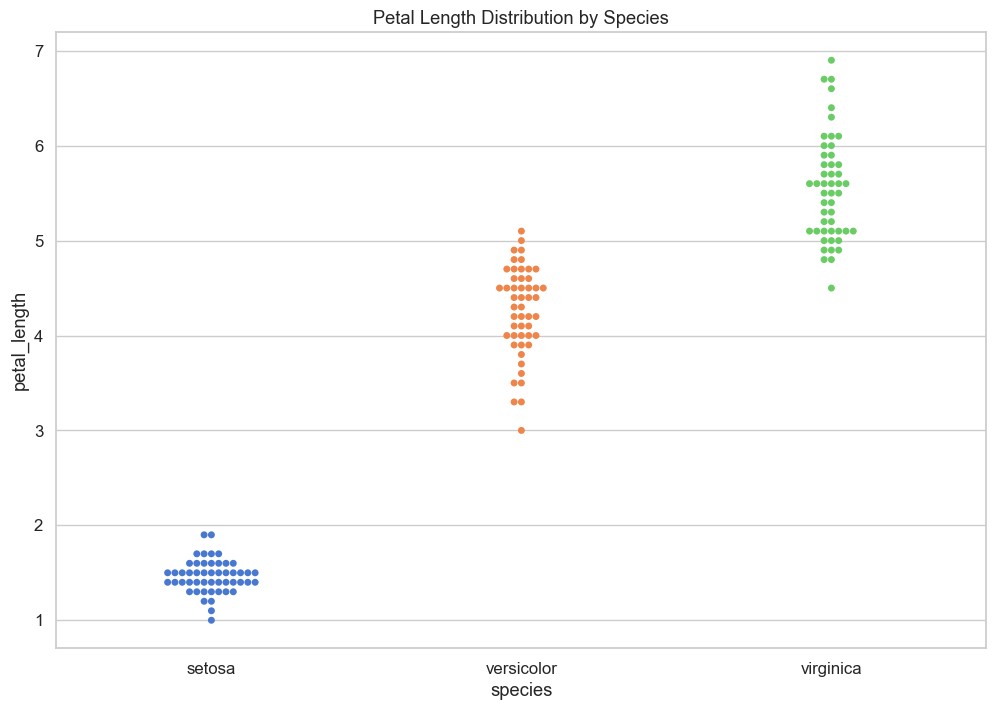

In [14]:
# Swarm plot for petal length by species
plt.figure(figsize=(12, 8))
sns.swarmplot(data=df, x="species", hue="species", y="petal_length", palette="muted")
plt.title("Petal Length Distribution by Species")
plt.show()



## ✨ Strip Plot with Jitter


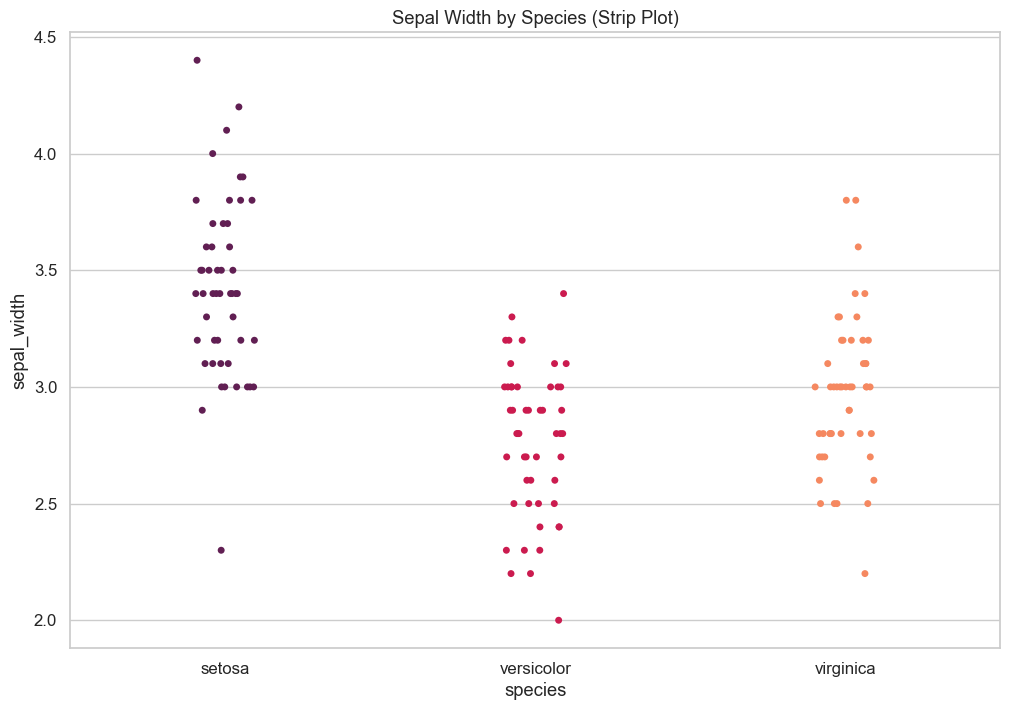

In [15]:
plt.figure(figsize=(12, 8))
sns.stripplot(data=df, x="species", y="sepal_width", hue="species", palette="rocket", dodge=False, jitter=True, legend=False)
plt.title("Sepal Width by Species (Strip Plot)")
plt.show()

##📌 3D Plot (Sepal Dimensions)

C:\Users\Zain\AppData\Local\Temp\ipykernel_19668\3472330317.py:18: UserWarning: Glyph 127802 (\N{HIBISCUS}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Zain\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127802 (\N{HIBISCUS}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


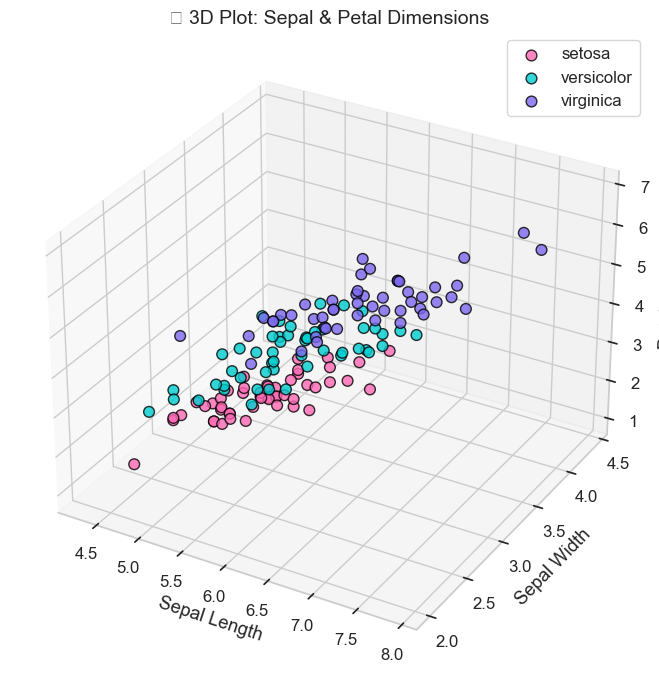

In [16]:
# 3D scatter plot of Sepal & Petal dimensions by species
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Custom colors for each species
colors = {'setosa': '#FF69B4', 'versicolor': '#00CED1', 'virginica': '#7B68EE'}

for species in df['species'].unique():
    subset = df[df['species'] == species]
    ax.scatter(subset['sepal_length'], subset['sepal_width'], subset['petal_length'],
               c=colors[species], label=species, s=60, edgecolor='black', alpha=0.8)

ax.set_xlabel('Sepal Length')
ax.set_ylabel('Sepal Width')
ax.set_zlabel('Petal Length')
ax.set_title('🌺 3D Plot: Sepal & Petal Dimensions', fontsize=14)
ax.legend()
plt.tight_layout()
plt.show()


## 📌 3D Plot (All Features)



C:\Users\Zain\AppData\Local\Temp\ipykernel_19668\1815962261.py:15: UserWarning: Glyph 127800 (\N{CHERRY BLOSSOM}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Zain\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127800 (\N{CHERRY BLOSSOM}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


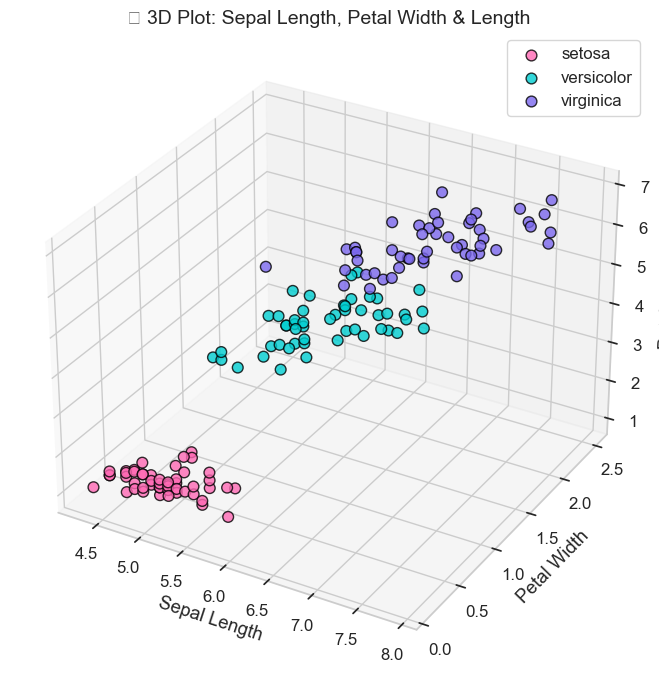

In [17]:
# 3D scatter plot: Sepal Length vs Petal Width & Length
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

for species in df['species'].unique():
    subset = df[df['species'] == species]
    ax.scatter(subset['sepal_length'], subset['petal_width'], subset['petal_length'],
               c=colors[species], label=species, s=60, edgecolor='black', alpha=0.8)

ax.set_xlabel('Sepal Length')
ax.set_ylabel('Petal Width')
ax.set_zlabel('Petal Length')
ax.set_title('🌸 3D Plot: Sepal Length, Petal Width & Length', fontsize=14)
ax.legend()
plt.tight_layout()
plt.show()


## ✅ Summary

I :
- Loaded the Iris dataset 🌼
- Explored it using Pandas
- Used Seaborn & Matplotlib for deep visual insights

This foundational EDA helps build data intuition for machine learning tasks 💡
